<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Walmart_Capstone_Project/blob/main/Capstone_Project_Final_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Wallmart**



---



## **Problem Statement**

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.


Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

1.   Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.

2.   Forecast the sales for each store for the next 12 weeks.

**Importing Necessary Libraries**

In [1]:
# importing data analysis libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# overriding matplotlib
sns.set()

# import datetime
import datetime as dt

In [2]:
# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings
warnings.filterwarnings('ignore')

**Importing the Dataset**

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat Capstone Project - Walmart/Walmart.csv")
df_saved = df.copy()

**Understanding the Dataset**

In [6]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [7]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
df.shape

(6435, 8)


## **Data Preprocessing and Cleaning**

**Checking for Missing Values**

In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Checking for Duplicates**

In [12]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates)
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool
Number of duplicates: 0


In [13]:
#function to examine dataframe for illegal emntries
#input is a dataframe and a list of possible invalid
#entries to look for
#Returns a dataframe of illegal entries if found

def get_invalid_entries(df, invalid_data = ['?', '@', '#']):
    bad_df = pd.DataFrame(columns = ['Col_name', 'bad_entry', 'Total']).dropna()
    col_names = list(df.columns)
    inv_ent, inv_col, num = [],[],[]

    for j in invalid_data:
        for i, col in enumerate(col_names):
            x = df[(df[col] == j)].shape[0]
            if x> 0:
                inv_ent.append(j)
                inv_col.append(col)
                num.append(x)
    bad_df['col_name'] = inv_col
    bad_df['bad_entry'] = inv_ent
    bad_df['Total'] = num
    if bad_df.shape[0]>0:
        print('Some invalid entries were found:')
        ret_val = bad_df
    else:
        ret_val = 'No Invalid/bad entries found'
    return ret_val

In [14]:
#check for Invalid Entry

get_invalid_entries(df, invalid_data = ['?', '@', '#'])

'No Invalid/bad entries found'

**Checking for Outliers**

In [15]:
# Calculate the first and third quartiles and IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Set the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

print(outliers)

# Count the number of outliers
count_outliers = len(outliers)

# Print the count of outliers
print("Count of Outliers:", count_outliers)


      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
474       4  17-12-2010    2740057.14             0        46.57       2.884   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
761       6  24-12-2010    2727575.18             0        55.07       2.886   
1329     10  26-11-2010    2939946.38             1        55.33       3.162   
1332     10  17-12-2010    2811646.85             0        59.15       3.125   
1333     10  24-12-2010    3749057.69   

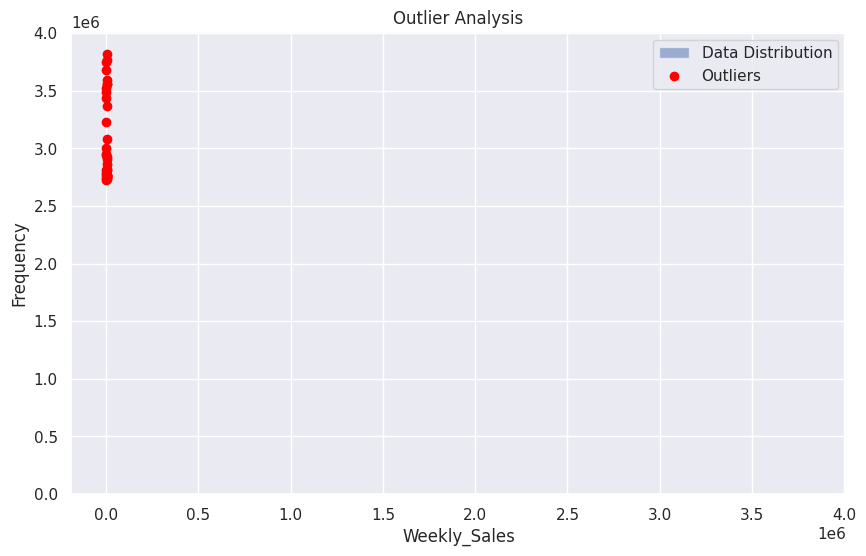

In [16]:
# Visualize the distribution and outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Weekly_Sales'], bins=50, alpha=0.5, label='Data Distribution')
plt.scatter(outliers.index, outliers['Weekly_Sales'], color='red', label='Outliers')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.title('Outlier Analysis')
plt.legend()
plt.show()

**Replacing Outliers with Median**

In [17]:
# Replace outliers with the median
median_value = df['Weekly_Sales'].median()
df['Weekly_Sales'] = np.where((df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound), median_value, df['Weekly_Sales'])
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [18]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.331487,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.314868e-01,1.000000,2.455618e-02,-0.043344,0.018476,-0.069211,-0.103941
Holiday_Flag,-4.386841e-16,0.024556,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.043344,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.018476,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.069211,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.103941,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


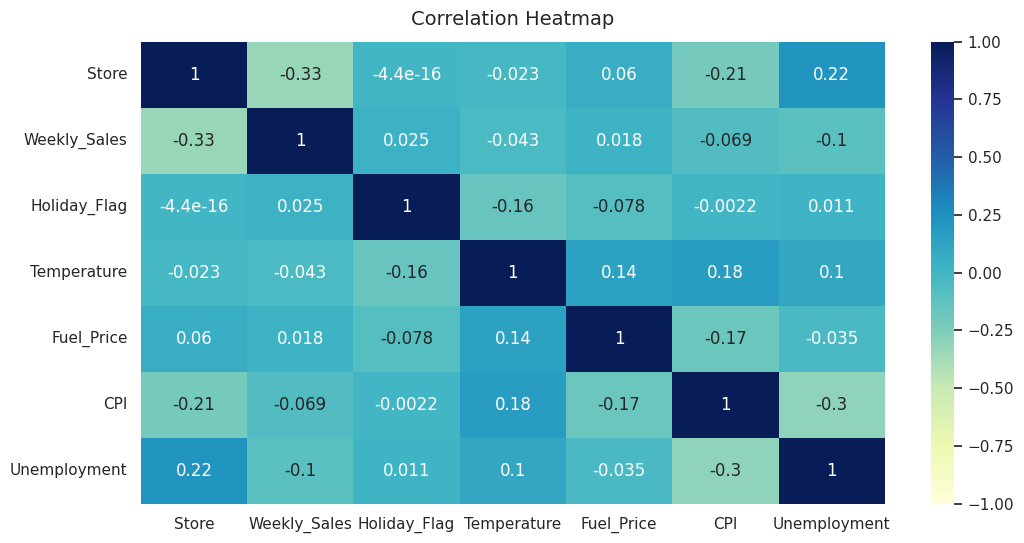

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [20]:
#function to extract data from a dataframe given the name of the data_field name and corresponding value
def get_store_df(data, data_field, field_value):
    return (data[data[data_field] == field_value])

In [21]:
store_corr = pd.DataFrame(index = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])

for i in range(1, 46):
    store_df = get_store_df(df, 'Store', i)
    store_corr['store_'+str(i)] = store_df.corr()['Weekly_Sales'].tolist()

In [22]:
store_corr.head()

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Holiday_Flag,0.194905,0.255012,0.208556,-0.156031,0.302525,0.181295,0.248766,0.172383,0.179264,-0.124917,...,-0.026605,-0.143336,-0.027163,0.127115,0.101524,0.097854,0.061810,0.017768,-0.074599,0.106357
Temperature,-0.222701,-0.139232,-0.377524,0.184882,-0.175517,-0.026491,0.015077,-0.312324,-0.208343,-0.167900,...,-0.094454,-0.300493,0.032993,0.064738,0.090598,0.106761,-0.151639,0.095272,0.267822,-0.201945
Fuel_Price,0.124592,-0.144209,0.140886,0.386253,0.167352,-0.062788,0.110356,0.029752,0.205404,-0.083813,...,-0.727462,0.208218,0.697184,0.266659,0.029627,0.305745,0.323031,-0.342037,0.607367,-0.046663


In [23]:
stor_corr = store_corr.dropna()
store_corrT = store_corr.T
del store_corrT['Weekly_Sales']
store_corrT

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
store_1,NaN,0.194905,-0.222701,0.124592,0.225408,-0.097955
store_2,NaN,0.255012,-0.139232,-0.144209,-0.043477,0.025963
store_3,NaN,0.208556,-0.377524,0.140886,0.317250,-0.230413
store_4,NaN,-0.156031,0.184882,0.386253,0.398682,-0.373037
store_5,NaN,0.302525,-0.175517,0.167352,0.308261,-0.207043
store_6,NaN,0.181295,-0.026491,-0.062788,0.055004,-0.000020
store_7,NaN,0.248766,0.015077,0.110356,0.289044,-0.165382
store_8,NaN,0.172383,-0.312324,0.029752,0.120255,-0.052580
store_9,NaN,0.179264,-0.208343,0.205404,0.294805,-0.191534
store_10,NaN,-0.124917,-0.167900,-0.083813,-0.045384,0.099528


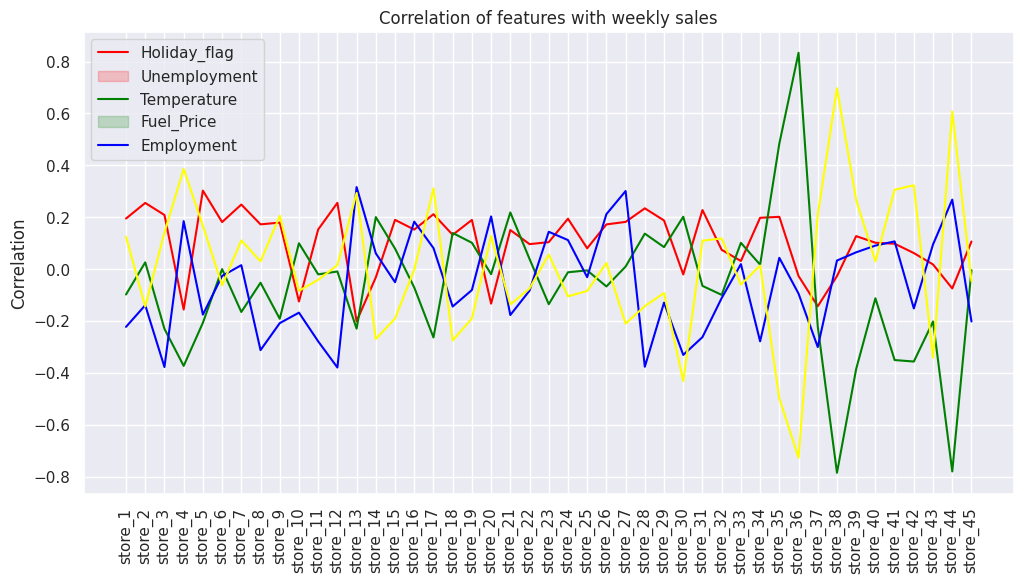

In [24]:
#Examine the correlationship of independent features with weekly_sales

fig, axes = plt.subplots(figsize = (12, 6))
plt.xticks(rotation = 90)
sns.lineplot(x = store_corrT.index, y = store_corrT.Holiday_Flag, color = 'red')
sns.lineplot(x = store_corrT.index, y = store_corrT.Unemployment, color = 'green')
sns.lineplot(x = store_corrT.index, y = store_corrT.Temperature, color = 'blue')
sns.lineplot(x = store_corrT.index, y = store_corrT.Fuel_Price, color = 'yellow')
#sns.lineplot(x = store_corrT.index, y = store_corrT.employment, color = 'black')
plt.legend(['Holiday_flag', 'Unemployment', 'Temperature', 'Fuel_Price', 'Employment'], loc = 'best')
plt.grid(True)
plt.ylabel('Correlation')
plt.title('Correlation of features with weekly sales')
plt.show()

In [25]:
#positive unemployment correlation
pos_u_corr = store_corrT[store_corrT['Unemployment']>0].sort_values(by ='Unemployment')

#negative unemployment correlation
neg_u_corr = store_corrT[store_corrT['Unemployment']<0].sort_values(by ='Unemployment')

In [26]:
print(f"\n There are {pos_u_corr['Unemployment'].shape[0]} stores whose sales will increase as unemployment increases")
pos_u_corr


 There are 16 stores whose sales will increase as unemployment increases


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
store_27,NaN,0.181904,0.300876,-0.210325,-0.202259,0.009678
store_34,NaN,0.197760,-0.278523,0.013688,0.115437,0.017010
store_2,NaN,0.255012,-0.139232,-0.144209,-0.043477,0.025963
store_22,NaN,0.096199,-0.082892,-0.074896,-0.038602,0.039043
store_15,NaN,0.189688,-0.050541,-0.190398,-0.174467,0.078905
store_29,NaN,0.187405,-0.129144,-0.092129,-0.072530,0.084682
store_10,NaN,-0.124917,-0.167900,-0.083813,-0.045384,0.099528
store_33,NaN,0.031160,0.019244,-0.059887,-0.052271,0.101175
store_19,NaN,0.189520,-0.080805,-0.190684,-0.155341,0.101464
store_28,NaN,0.234237,-0.376506,-0.142722,-0.095908,0.136671


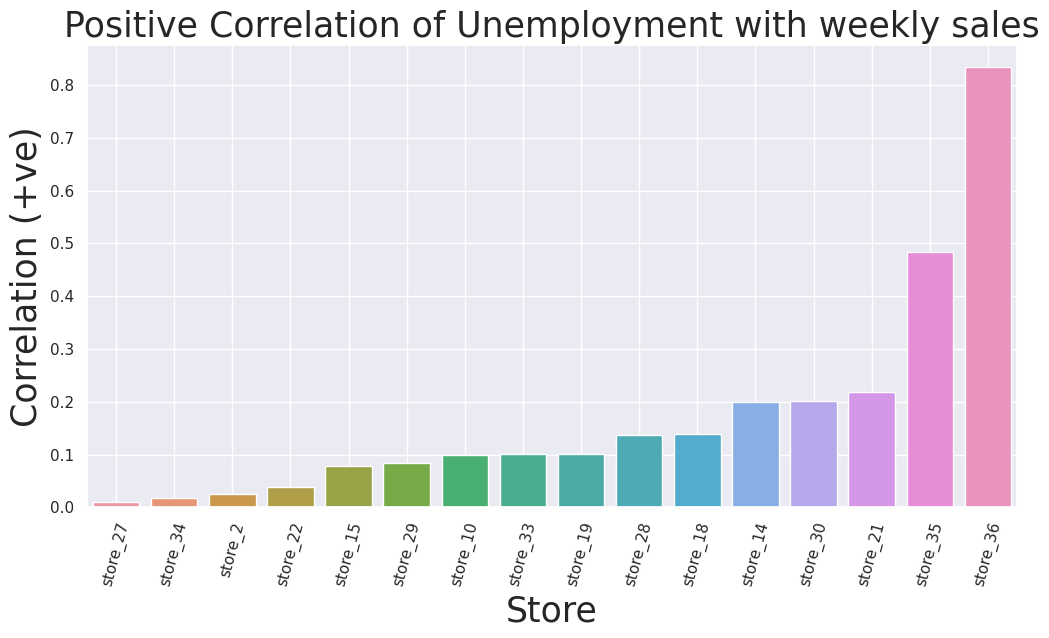

In [27]:
fig, axes = plt.subplots(figsize = (12, 6))
plt.xticks(rotation = 75)
sns.barplot(x = pos_u_corr.index, y= pos_u_corr.Unemployment)
plt.xlabel('Store', fontsize = 25)
plt.ylabel('Correlation (+ve)', fontsize = 25)
plt.title('Positive Correlation of Unemployment with weekly sales', fontsize = 25)
plt.grid(True)

In [28]:
print(f"\n There are {neg_u_corr['Unemployment'].shape[0]} stores whose sales will decreases as unemployment increases")
neg_u_corr


 There are 29 stores whose sales will decreases as unemployment increases


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
store_38,NaN,-0.027163,0.032993,0.697184,0.812837,-0.785290
store_44,NaN,-0.074599,0.267822,0.607367,0.740150,-0.780076
store_39,NaN,0.127115,0.064738,0.266659,0.428043,-0.384681
store_4,NaN,-0.156031,0.184882,0.386253,0.398682,-0.373037
store_42,NaN,0.061810,-0.151639,0.323031,0.360859,-0.356355
store_41,NaN,0.097854,0.106761,0.305745,0.392293,-0.350630
store_17,NaN,0.211512,0.081012,0.311631,0.348571,-0.263600
store_3,NaN,0.208556,-0.377524,0.140886,0.317250,-0.230413
store_13,NaN,-0.201370,0.316177,0.293517,0.240520,-0.229574
store_37,NaN,-0.143336,-0.300493,0.208218,0.244507,-0.221287


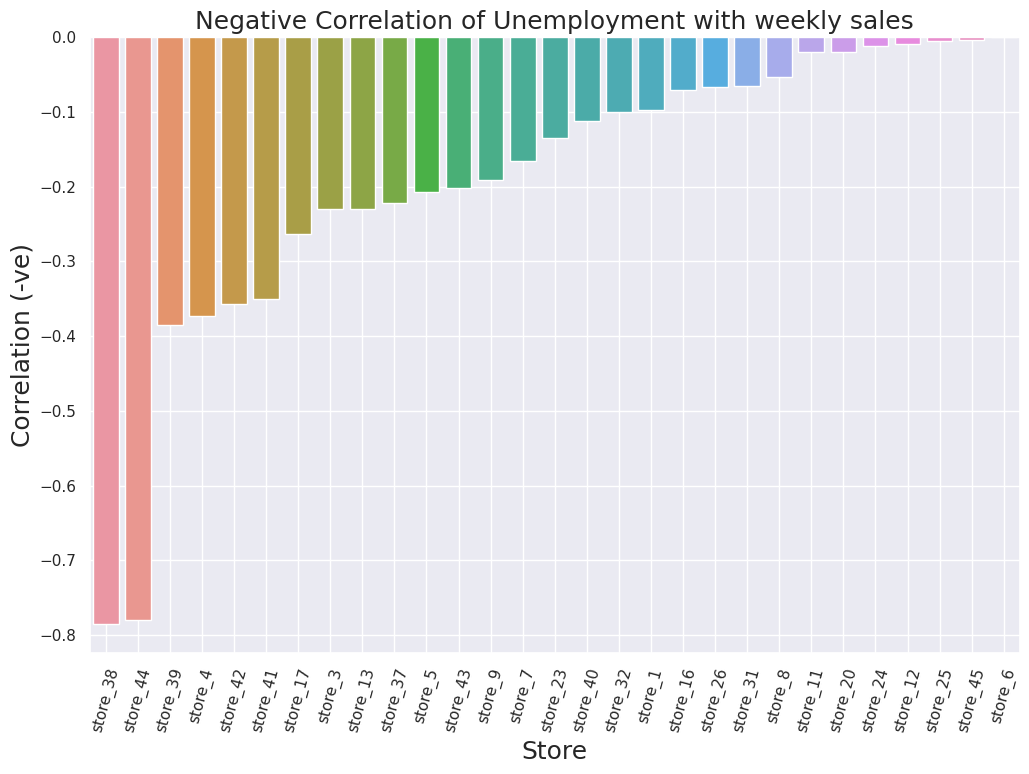

In [34]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.xticks(rotation = 75)
sns.barplot(x = neg_u_corr.index, y=neg_u_corr.Unemployment)
plt.xlabel('Store', fontsize = 18)
plt.ylabel('Correlation (-ve)', fontsize = 18)
plt.title('Negative Correlation of Unemployment with weekly sales', fontsize = 18)
plt.grid(True)

In [37]:
unemp_1 = pd.DataFrame(zip(pos_u_corr.index, pos_u_corr.Unemployment), columns = ['store(pos)', 'corr(pos)'])
unemp_2 = pd.DataFrame(zip(neg_u_corr.index, neg_u_corr.Unemployment), columns = ['store(neg)', 'corr(neg)'])
Unemployment = pd.concat([unemp_2, unemp_1], axis=1, join = 'outer', ignore_index = True)
Unemployment.columns = ['store(neg)', 'corr(neg)', 'store(pos)', 'corr(pos)']
Unemployment

,store(neg),corr(neg),store(pos),corr(pos)
0,store_38,-0.785290,store_27,0.009678
1,store_44,-0.780076,store_34,0.017010
2,store_39,-0.384681,store_2,0.025963
3,store_4,-0.373037,store_22,0.039043
4,store_42,-0.356355,store_15,0.078905
5,store_41,-0.350630,store_29,0.084682
6,store_17,-0.263600,store_10,0.099528
7,store_3,-0.230413,store_33,0.101175
8,store_13,-0.229574,store_19,0.101464
9,store_37,-0.221287,store_28,0.136671


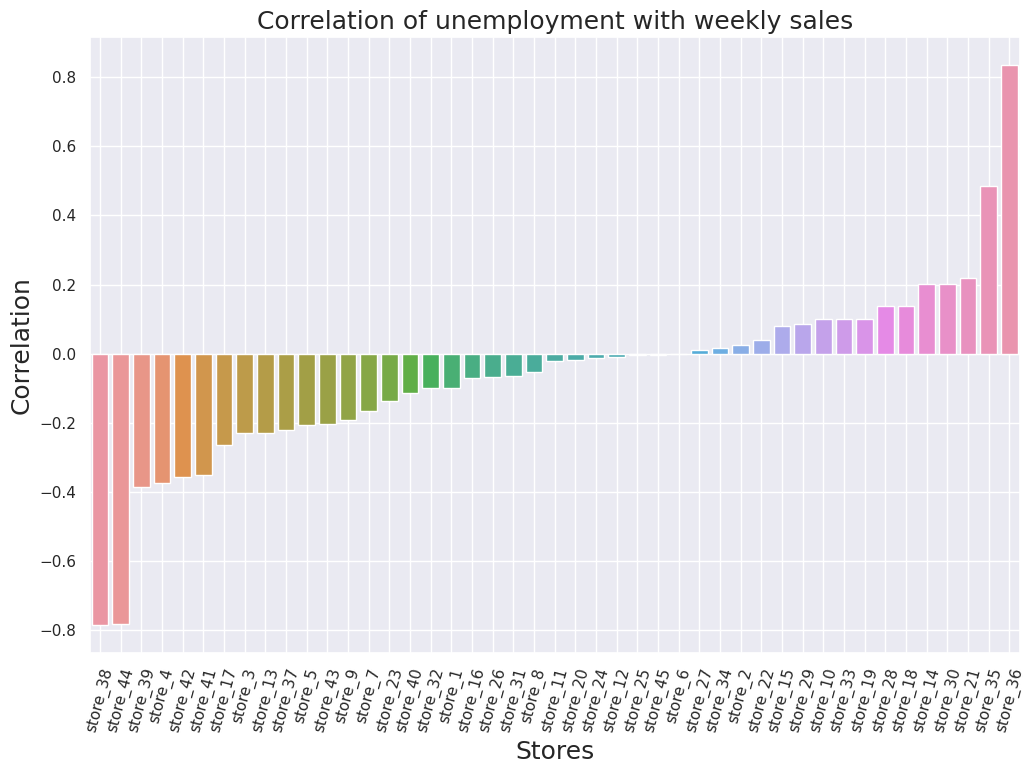

In [41]:
store_corrTT = store_corrT.sort_values(by = 'Unemployment')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Unemployment)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of unemployment with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

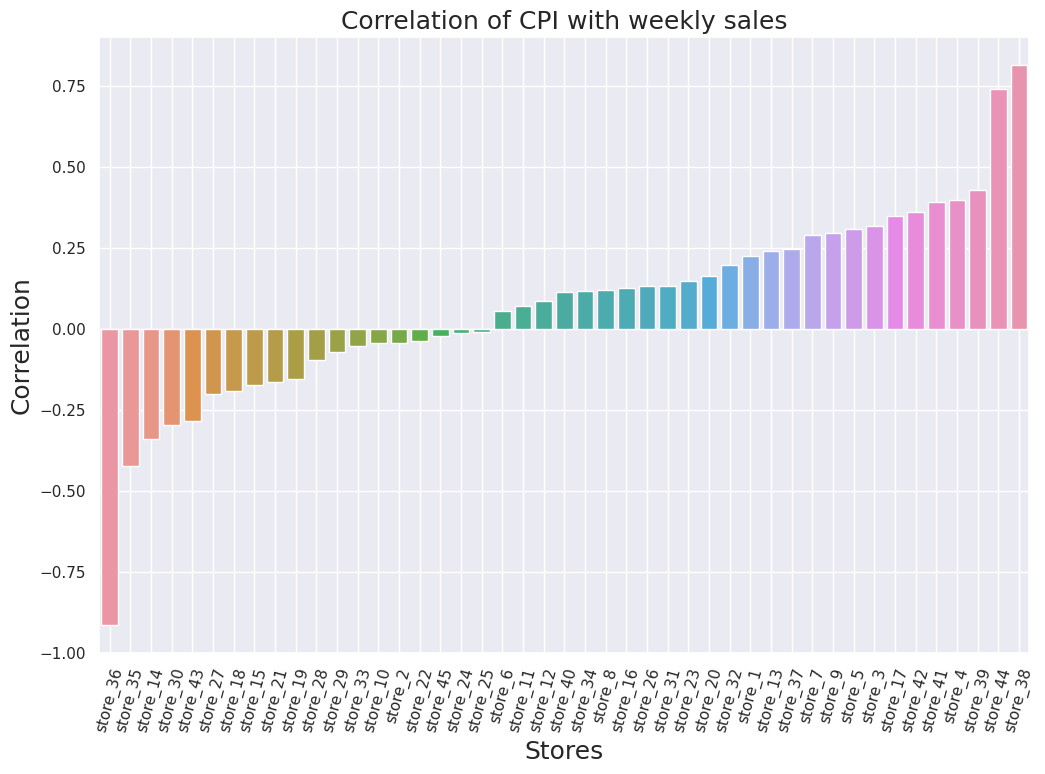

In [42]:
store_corrTT = store_corrT.sort_values(by = 'CPI')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.CPI)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of CPI with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

In [43]:
store_corrTT.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

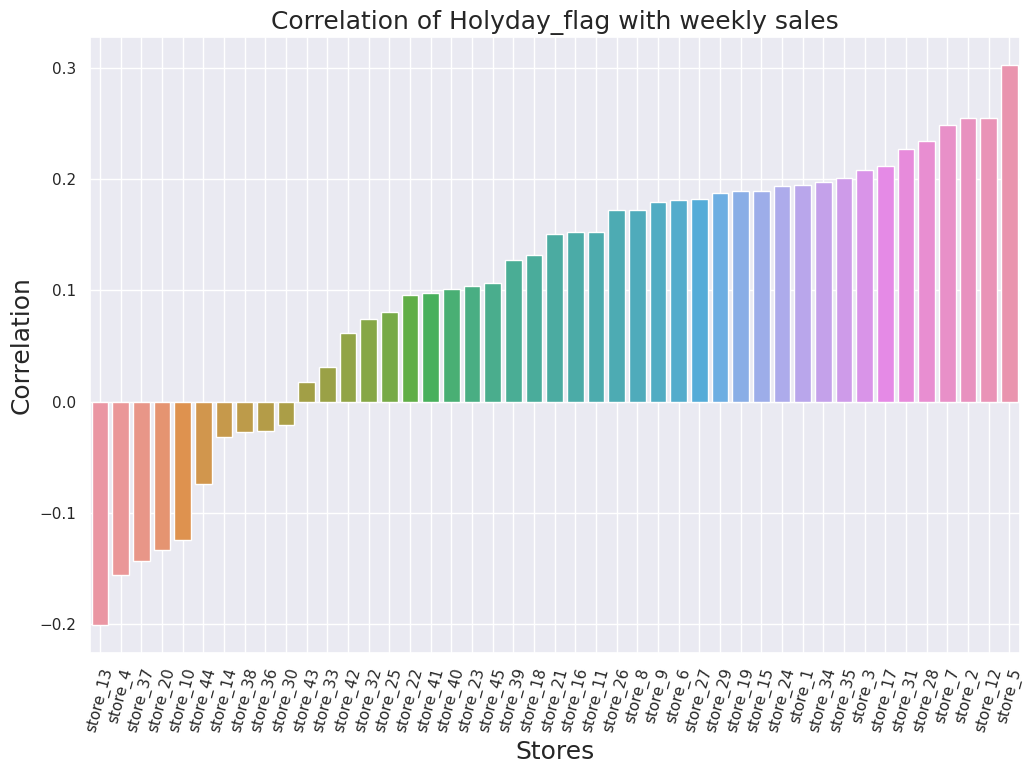

In [44]:
store_corrTT = store_corrT.sort_values(by = 'Holiday_Flag')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Holiday_Flag)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of Holyday_flag with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

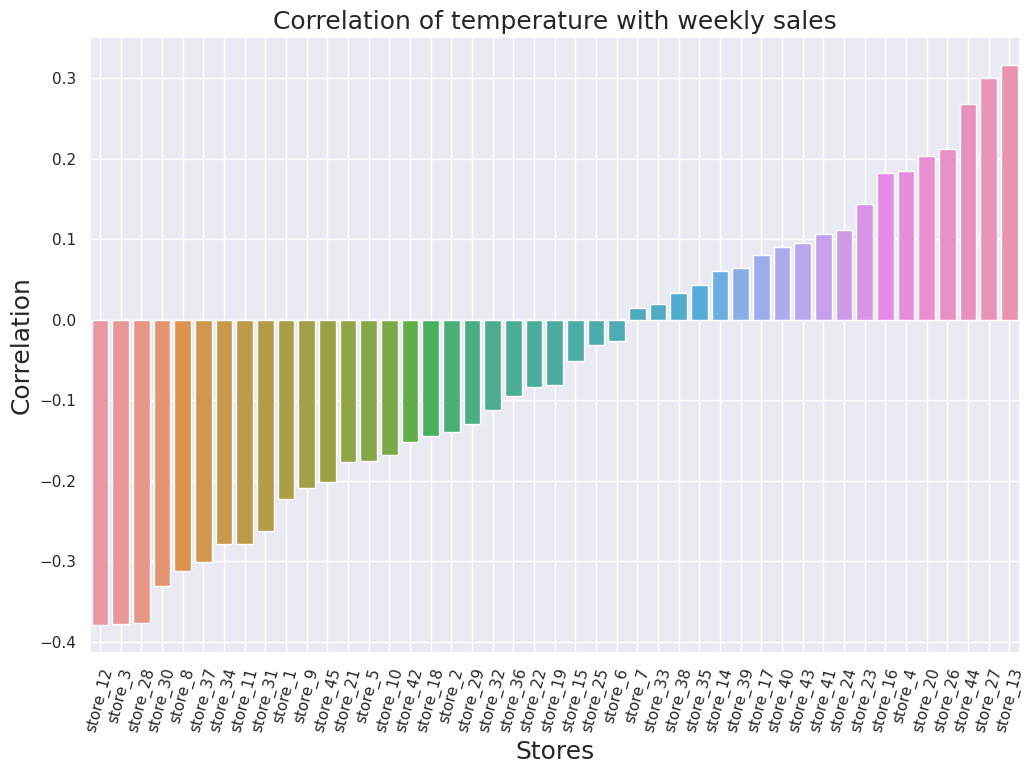

In [46]:
store_corrTT = store_corrT.sort_values(by = 'Temperature')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Temperature)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of temperature with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

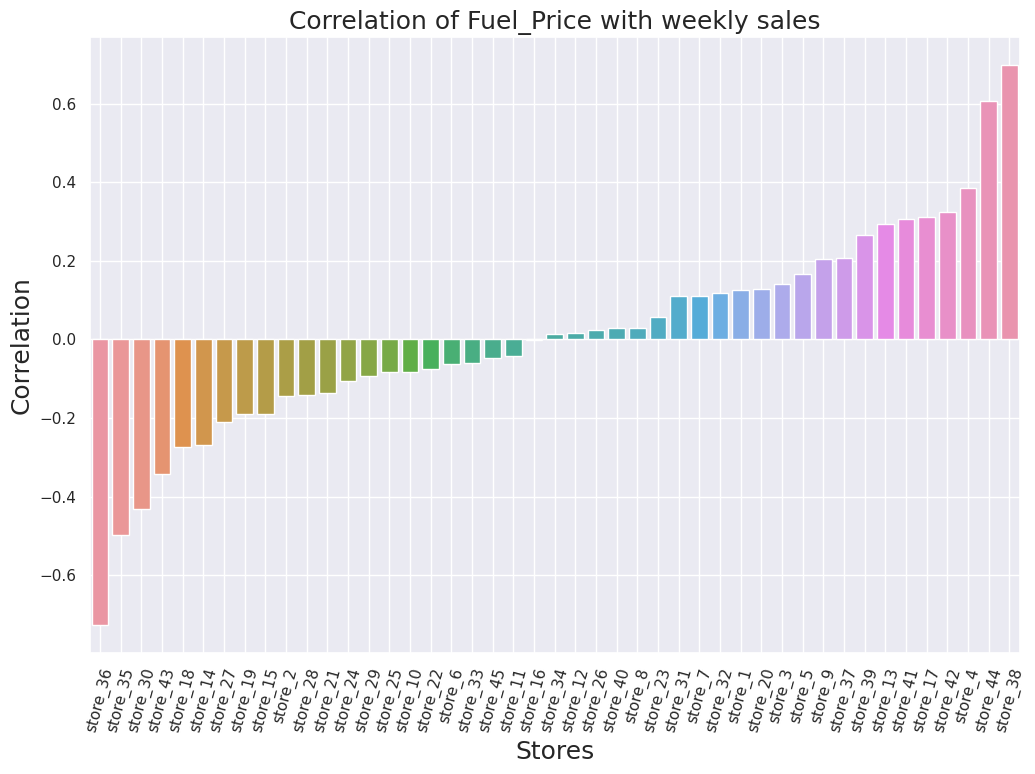

In [47]:
store_corrTT = store_corrT.sort_values(by = 'Fuel_Price')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Fuel_Price)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of Fuel_Price with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

In [50]:
# Explore correlation of other features with weekly_sales
df.corr()['Weekly_Sales']

Store          -0.331487
Weekly_Sales    1.000000
Holiday_Flag    0.024556
Temperature    -0.043344
Fuel_Price      0.018476
CPI            -0.069211
Unemployment   -0.103941
Name: Weekly_Sales, dtype: float64

**Correlation shows that fuel_price has the least effect on weekly_sales and unemployment has the strongest correlation with negative correlation which implies that as unemployment goes up, the weekly_sales desrese.**

In [51]:
Highest_wkly_sales = sales.groupby(['store'])['weekly_sales'].sum().reset_index().sort_values('weekly_sales', ascending=False)
store_list = Highest_wkly_sales['store'].tolist()
highest_10 = Highest_wkly_sales['store'].head(10).tolist()

print(Highest_wkly_sales.head(10),f'\n\n The Ten stores with the highest weekly sales{highest_10}')

NameError: ignored

## **Exploratory Data Analysis**

**Univariate Analysis**

In [ ]:
df['Store'].unique()

In [ ]:
df['Store'].value_counts()

In [ ]:
#Storewise Sales


# Assuming you have a DataFrame called "walmart_df" with columns "Store" and "Sales"

# Group the data by "Store" and calculate the sum of "Sales" for each store
storewise_sales = df.groupby('Store')['Weekly_Sales'].sum()

print(storewise_sales)


In [ ]:

# Assuming you have a DataFrame called "walmart_df" with columns "Store" and "Sales"
# And you have already calculated the store-wise sales in the "storewise_sales" Series

# Plot the store-wise sales using a bar plot
plt.figure(figsize=(12, 7))
storewise_sales.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Store-wise Sales in Walmart')
plt.xticks(rotation=0)  # To show the store numbers as x-axis labels without rotation
plt.grid(axis='y')  # Add horizontal gridlines for better readability
plt.show()


In [ ]:
# Find the average sales for each store
average_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Find the maximum sales for each store
max_sales = df.groupby('Store')['Weekly_Sales'].max()

# Find the minimum sales for each store
min_sales = df.groupby('Store')['Weekly_Sales'].min()

print(average_sales)


In [ ]:
# Creating plot
fig, ax = plt.subplots()
plt.pie(df, labels = 'Weekly_Sales',autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

**Year vs Fuel_price**

**Weekly sales vs Store**

**Store vs Unemployment**

**Correlation Map**

**Bivariate Analysis**

**Multivariate Analysis**